# Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей.

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
%matplotlib inline 
sns.set(style="ticks")

In [2]:
wine = load_wine()

In [44]:
df = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

In [45]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [46]:
# проверим есть ли пропущенные значения
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [67]:
# Масштабирование
scaler = MinMaxScaler()
df[['alcohol', 'hue']] = scaler.fit_transform(df[['alcohol', 'hue']])
data = df[['alcohol','hue','target']]

C:\Users\Huawei\AppData\Local\Temp\ipykernel_4256\4188928487.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['alcohol', 'hue']] = scaler.fit_transform(df[['alcohol', 'hue']])


In [68]:
data.head()

,alcohol,hue,target
0,0.842105,0.455285,0.0
1,0.571053,0.463415,0.0
2,0.560526,0.447154,0.0
3,0.878947,0.308943,0.0
4,0.581579,0.455285,0.0


In [87]:
# разделение на обучающую и тестовую выборки
y = data['target']
X = data.drop('target', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [88]:
X_train.shape, y_train.shape

((142, 2), (142,))

In [89]:
# Размер тестовой выборки
X_test.shape, y_test.shape

((36, 2), (36,))

### Обучение модели ближайших соседей для произвольно заданного гиперпараметра K.

In [90]:
KNeighborsClassifierObj = KNeighborsClassifier(n_neighbors=3)

In [91]:
KNeighborsClassifierObj.fit(X_train, y_train)
target1_1 = KNeighborsClassifierObj.predict(X_train)
target1_2 = KNeighborsClassifierObj.predict(X_test)

In [92]:
# оценка качества
accuracy_score(y_train, target1_1), accuracy_score(y_test, target1_2)

(0.9225352112676056, 0.8888888888888888)

### Кросс-валидация

In [93]:
# стратегия K-fold
kf = KFold(n_splits=10)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), 
                         wine.data, wine.target, scoring='accuracy', 
                         cv=kf)
scores, np.mean(scores)

(array([0.94444444, 0.77777778, 0.77777778, 0.61111111, 0.44444444,
        0.72222222, 0.83333333, 0.61111111, 0.35294118, 0.41176471]),
 0.6486928104575164)

In [94]:
# стратегия Leave One Out
kf = LeaveOneOut()
scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), 
                         wine.data, wine.target, scoring='accuracy', 
                         cv=kf)
scores, np.mean(scores)

(array([1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
        0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
        1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
        0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
        0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
        1., 0., 1., 1., 1., 0., 0., 1.]),
 0.7247191011235955)

### Подбор гиперпараметров на основе решетчатого поиска, случайного и кросс-валидации

In [123]:
n_range = np.array(range(5,31,1))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
         22, 23, 24, 25, 26, 27, 28, 29, 30])}]

In [124]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=LeaveOneOut(), scoring='accuracy')
clf_gs.fit(X_train, y_train)

CPU times: total: 14 s
Wall time: 14 s


GridSearchCV(cv=LeaveOneOut(), estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30])}],
             scoring='accuracy')

In [125]:
# Лучшее значение метрики
clf_gs.best_score_

0.8943661971830986

In [126]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 8}

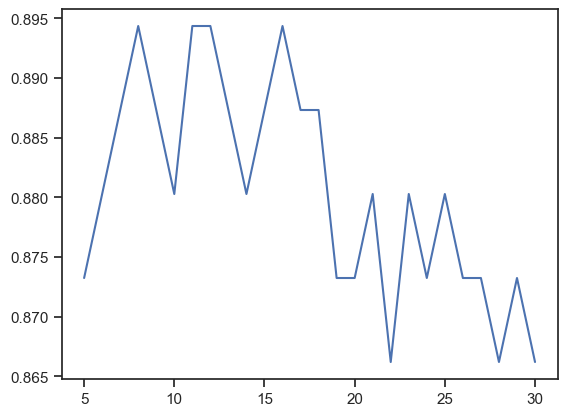

In [127]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [128]:
%%time
clf_rs = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, cv=LeaveOneOut(), scoring='accuracy')
clf_rs.fit(X_train, y_train)

CPU times: total: 4.5 s
Wall time: 4.49 s


RandomizedSearchCV(cv=LeaveOneOut(), estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30])}],
                   scoring='accuracy')

In [129]:
# Лучшее значение метрики
clf_rs.best_score_

0.8873239436619719

In [130]:
# Лучшее значение параметров
clf_rs.best_params_

{'n_neighbors': 13}

In [1]:
# plt.plot(n_range, clf_rs.cv_results_['mean_test_score'])

Первый способ нашел решение лучше

### Обучение модели и оценка качества с учетом подобранных гиперпараметров

In [133]:
clf_gs.best_estimator_.fit(X_train, y_train)
target2_1 = clf_gs.best_estimator_.predict(X_train)
target2_2 = clf_gs.best_estimator_.predict(X_test)

In [134]:
# Новое качество модели
accuracy_score(y_train, target2_1), accuracy_score(y_test, target2_2)

(0.9014084507042254, 0.9166666666666666)

In [135]:
# Качество модели до подбора гиперпараметров
accuracy_score(y_train, target1_1), accuracy_score(y_test, target1_2)

(0.9225352112676056, 0.8888888888888888)